# Training a NN with Urban Sound Challenge Data

**Background:**

A baseline model will be built based on the urban sound challenge data, using transfer learning from imageNet

## Libraries and File Locations

In [1]:
import sys
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import soundfile
from scipy import signal
import librosa
import matplotlib.pyplot as plt
import specdisplay

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

In [4]:
test_file_dir = "../tests/wav/"

## Load sample WAV File

Loading in the form of melspectrograms

**MFCCs and Spectrograms**

In [5]:
n_mels = 23

In [6]:
n_windows = 200

In [7]:
samples, sample_rate = soundfile.read(test_file_dir+"hello.wav")

In [8]:
samples.shape

(66000, 4)

In [9]:
sample_channel_1 = samples[:,1]

In [10]:
hop_length = round(len(sample_channel_1)/n_windows)
hop_length

330

In [11]:
mel_spectrogram = librosa.feature.melspectrogram(y=sample_channel_1, 
                                                 sr=sample_rate,
                                                 n_fft=2048, 
                                                 hop_length=hop_length,
                                                 n_mels = n_mels,
                                                fmax = 8000)

In [12]:
mel_spectrogram.shape

(23, 201)

In [13]:
mel_spectrogram[:,:n_windows].shape

(23, 200)

Note that the below function (power_to_db) is equivalent to new: librosa.core.logamplitude

In [14]:
def extract_spectrogram(samples,sample_rate,n_windows=100,n_mels=23,n_fft=2048,fmax=8000):
    feature_set = []
    if samples.shape[1:]:
        channels = samples.shape[1:][0]
    else:
        channels = 1
        samples = np.expand_dims(samples, axis=1)
    for i in range(channels):
        sample_channel_x = samples[:,i]
        hop_length = round(len(sample_channel_x)/n_windows)
        mel_spectrogram = librosa.feature.melspectrogram(y=sample_channel_x, 
                                                     sr=sample_rate,
                                                     n_fft=n_fft, 
                                                     hop_length=hop_length,
                                                     n_mels = n_mels,
                                                    fmax = fmax)
        decibel_spec = librosa.logamplitude(mel_spectrogram,ref_power=np.max)
        feature_set.append(decibel_spec)
    feature_set = np.array(feature_set)
    feature_set = np.mean(feature_set,axis=0)[:,:n_windows]
    return feature_set

In [15]:
features = extract_spectrogram(samples,sample_rate)
features.shape

(23, 100)

../specdisplay.py:676: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


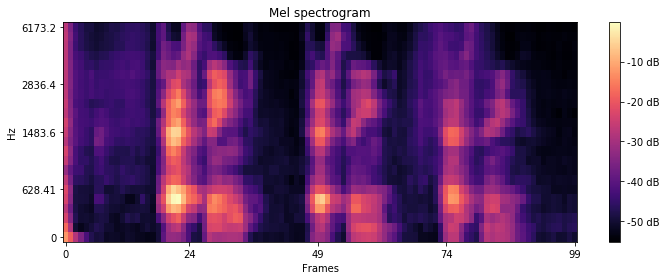

In [16]:
decibel_spec = extract_spectrogram(samples,sample_rate)
#decibel_spec = np.mean(features,axis=0)
plt.figure(figsize=(10, 4))
specdisplay.specshow(decibel_spec,
                          y_axis='mel', fmax=8000,
                          x_axis='frames',freq_fmt = 'Hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

## Training using Log Spectrogram

In [32]:
URBAN_SOUND_DIR = "/media/romulo/ROMULO'S/urban_sound_challenge/"

In [31]:
train_df = pd.read_csv(URBAN_SOUND_DIR+'train.csv')
test_df = pd.read_csv(URBAN_SOUND_DIR+'test.csv')

FileNotFoundError: [Errno 2] File b"/media/nvidia/ROMULO'S/urban_sound_challenge/train.csv" does not exist: b"/media/nvidia/ROMULO'S/urban_sound_challenge/train.csv"

In [ ]:
def parse_features(row):
    # fun
    folder = 'Train'
    #ction to load files and extract features
    file_name = os.path.join(URBAN_SOUND_DIR,folder, str(row.ID) + '.wav')
   # handle exception to check if there isn't a file which is corrupted

    samples, sample_rate = soundfile.read(file_name)
    features = extract_spectrogram(samples,sample_rate)
    return pd.Series([features, row.Class])

In [ ]:
def parse_features_test(row):
    # fun
    folder = 'Test'
    #ction to load files and extract features
    file_name = os.path.join(URBAN_SOUND_DIR,folder, str(row.ID) + '.wav')
   # handle exception to check if there isn't a file which is corrupted

    samples, sample_rate = soundfile.read(file_name)
    features = extract_spectrogram(samples,sample_rate)
    return pd.Series([features,row.ID])

In [ ]:
temp = train_df.apply(parse_features, axis=1)
temp.columns = ['feature', 'label']

In [ ]:
temp.to_json(URBAN_SOUND_DIR+"train_mel_spectrogram_transformed.json")

In [ ]:
temp_test = test_df.apply(parse_features_test, axis=1)
temp_test.columns = ['feature','row_id']

In [ ]:
temp_test.to_json(URBAN_SOUND_DIR+"test_mel_spectrogram_transformed.json")